*Note: This is a sample template outline **for your reference only**.  
You are not by any means obliged to follow the same format.*

# [An Analysis on driving factors behind SG government's operating expenditure]

### [Team 4: James Oon and Luo Shao Xuan]

**Introduction - Why we chose this topic

We know that SG government is fiscally prudent and we want to know the driving factors that help the government maintain its fiscal position.

Fiscal position is a topic close to our hearts as it influences the Government budget, and major decisions such as GST rate hikes and payouts, etc.

We realised early on that we can reconcile the Overall Fiscal Position against Revenue and Expenditure*. We did a pivot using Total Expenditure table and found out:
Overall Fiscal Position = Total Revenue – Total Expenditure


### CONTENTS

<font color="grey">*Reminder: Contents don't have to be in this order or follow these exact headings.  
Present yours in a way that makes sense for your analyses and workflow*</font>

Section 1: Data Exploration 

Section 2: Data Preparation

Section 3: Hypotheses

Section 4: Overall Conclusion

---

#### <u>Section 1: Data Exploration</u>

*Overview and understanding of data, initial observations, etc*

In [1]:
import numpy as np
import pandas as pd

In [3]:
govt_ebt = pd.read_csv('government-expenditure-by-type.csv')
govt_fp = pd.read_csv('government-fiscal-position.csv')
govt_mp = pd.read_csv('government-manpower.csv')
govt_or = pd.read_csv('government-operating-revenue.csv')
govt_te = pd.read_csv('government-total-expenditure.csv')

Observations on government-expenditure-by-type:
1. Year 1997 to 2021
2. Type: Operating vs Development
3. Categories: Transfers, Running Costs, Development
4. Class: 8 classes, not categorised by ministries
5. Actual_revised_estimate: 2021 > estimate, 2020 > revised, 2019 and before > actual
6. Amount is provided

In [4]:
# Get summary info on government-expenditure-by-type
display(govt_ebt.describe())
govt_ebt.info()
govt_ebt.isna().sum()

,financial_year,amount
count,200.000000,200.000000
mean,2009.000000,5986.295000
std,7.229198,5305.154892
min,1997.000000,0.000000
25%,2003.000000,2247.750000
50%,2009.000000,4393.000000
75%,2015.000000,8500.750000
max,2021.000000,26605.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   financial_year            200 non-null    int64 
 1   actual_revised_estimated  200 non-null    object
 2   type                      200 non-null    object
 3   category                  200 non-null    object
 4   class                     200 non-null    object
 5   amount                    200 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 9.5+ KB


financial_year              0
actual_revised_estimated    0
type                        0
category                    0
class                       0
amount                      0
dtype: int64

In [6]:
# Get unique values and their corresponding counts on government-expenditure-by-type
print(govt_ebt['type'].nunique()) 
print(govt_ebt['type'].unique())
print(govt_ebt['type'].value_counts())

print(govt_ebt['category'].nunique())  
print(govt_ebt['category'].unique())
print(govt_ebt['category'].value_counts())

print(govt_ebt['class'].nunique())  
print(govt_ebt['class'].unique())
print(govt_ebt['class'].value_counts())

2
['Operating' 'Development']
Operating      150
Development     50
Name: type, dtype: int64
3
['Running Cost' 'Transfers' 'Development Expenditure']
Transfers                  75
Running Cost               75
Development Expenditure    50
Name: category, dtype: int64
8
['Expenditure on Manpower' 'Other Operating Expenditure'
 'Grants, Subventions & Capital Injections to Organisations'
 'Social Transfers' 'Transfers to Institutions & Organisations'
 'International Organisations & Overseas Development Assistance'
 'Direct Development' 'Grants & Capital injections to Organisations']
Social Transfers                                                 25
Transfers to Institutions & Organisations                        25
Grants & Capital injections to Organisations                     25
Other Operating Expenditure                                      25
Grants, Subventions & Capital Injections to Organisations        25
Expenditure on Manpower                                          25
Inte

Observations on government-fiscal-position:
1. Year from 1997 to 2023
2. Actual_Revised_Estimate: Actual > before 2021, Revised > 2022, Estimate > 2023
3. Item: 12 types > 4 under balance, 6 under expenditure, 2 under revenue
4. Category: 3 types > balance, expenditure, revenue ==> revenue - expenditure = balance, to be validated
5. Amount and % of gdp is provided

In [7]:
# Get summary info on government-fiscal-position
display(govt_fp.describe())
govt_fp.info()
govt_fp.isna().sum()

,year_of_balance,amount,percent_of_gdp
count,324.000000,324.000000,324.000000
mean,2010.000000,9471.709877,0.028633
std,7.800929,22265.493648,0.057854
min,1997.000000,-52491.000000,-0.107000
25%,2003.000000,0.000000,0.000000
50%,2010.000000,978.500000,0.004000
75%,2017.000000,6872.500000,0.023000
max,2023.000000,106948.000000,0.203000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year_of_balance           324 non-null    int64  
 1   actual_revised_estimated  324 non-null    object 
 2   category                  324 non-null    object 
 3   item                      324 non-null    object 
 4   amount                    324 non-null    int64  
 5   percent_of_gdp            324 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 15.3+ KB


year_of_balance             0
actual_revised_estimated    0
category                    0
item                        0
amount                      0
percent_of_gdp              0
dtype: int64

In [8]:
# Unique values and their corresponding counts on government-fiscal-position
print(govt_fp['item'].nunique())  
print(govt_fp['item'].unique())
print(govt_fp['item'].value_counts())

print(govt_fp['category'].nunique())  
print(govt_fp['category'].unique())
print(govt_fp['category'].value_counts())

12
['Basic Balance' 'Overall Budget Balance' 'Overall Fiscal Position'
 'Primary Balance'
 'Capitalisation of Nationally Significant Infrastructure'
 'Depreciation of Nationally Significant Infrastructure'
 'SINGA Interest Costs and Loan Expenses'
 'Special Transfers Excluding Top-ups to Endowment and Trust Funds'
 'Top-ups to Endowment and Trust Funds' 'Total Expenditure'
 'Net Investment Income/Returns Contribution' 'Operating Revenue']
Basic Balance                                                       27
Total Expenditure                                                   27
Overall Fiscal Position                                             27
Operating Revenue                                                   27
SINGA Interest Costs and Loan Expenses                              27
Special Transfers Excluding Top-ups to Endowment and Trust Funds    27
Depreciation of Nationally Significant Infrastructure               27
Capitalisation of Nationally Significant Infrastructure     

Observations on government-manpower:
1. From Year 1997 to 2023
2. Actual_Revised_Estimated: Estimated > 2023, Revised > 2022, Actual > 2021 and before
3. Ministry: 24 types, these are terms we are familiar with
4. Number of headcount is provided

In [9]:
# Get summary info on government-manpower
display(govt_mp.describe())
govt_mp.info()
govt_mp.isna().sum()

,financial_year,number
count,648.000000,648.000000
mean,2010.000000,4901.125772
std,7.794898,10972.541619
min,1997.000000,0.000000
25%,2003.000000,166.000000
50%,2010.000000,1259.000000
75%,2017.000000,3777.500000
max,2023.000000,57117.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   financial_year            648 non-null    int64  
 1   actual_revised_estimated  648 non-null    object 
 2   ministry                  648 non-null    object 
 3   number                    648 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 20.4+ KB


financial_year              0
actual_revised_estimated    0
ministry                    0
number                      0
dtype: int64

*You can intersperse markdown cells between your code cells for commentary.*

In [11]:
# Unique values and their corresponding counts on government-manpower
print(govt_mp['ministry'].nunique()) 
print(govt_mp['ministry'].unique())
print(govt_mp['ministry'].value_counts())

24
["Attorney-General's Chambers" "Auditor-General's Office" 'Cabinet Office'
 'Civil List' 'Communications and Information'
 'Culture, Community and Youth' 'Defence' 'Education' 'Finance'
 'Foreign Affairs' 'Health' 'Home Affairs' 'Judicature' 'Law' 'Manpower'
 'National Development' 'Parliament' 'Presidential Councils'
 "Prime Minister's Office" 'Public Service Commission'
 'Social and Family Development' 'Sustainability and the Environment'
 'Trade and Industry' 'Transport']
Presidential Councils                 27
Public Service Commission             27
Trade and Industry                    27
Communications and Information        27
Transport                             27
Cabinet Office                        27
Law                                   27
Education                             27
Prime Minister's Office               27
Foreign Affairs                       27
Home Affairs                          27
Health                                27
National Development     

Observations on government-operating-revenue:
1. Year from 1997 to 2023
2. Class: 3 types > Fees and Charges, Others, Tax
3. Type: 14 types > 2 under Fees and Charges, 1 under Others, 11 under Tax
4. Amount and % of gdp provided

In [12]:
# Get summary info on government-operating-revenue
display(govt_or.describe())
govt_or.info()
govt_or.isna().sum()

,financial_year,amount,percent_of_gdp
count,378.000000,378.000000,378.000000
mean,2010.000000,3628.735450,0.010902
std,7.799204,3798.122025,0.009301
min,1997.000000,93.000000,0.000000
25%,2003.000000,1486.750000,0.005000
50%,2010.000000,2207.500000,0.008000
75%,2017.000000,3944.250000,0.013000
max,2023.000000,24258.000000,0.049000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   financial_year            378 non-null    int64  
 1   actual_revised_estimated  378 non-null    object 
 2   class                     378 non-null    object 
 3   type                      378 non-null    object 
 4   amount                    378 non-null    int64  
 5   percent_of_gdp            378 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 17.8+ KB


financial_year              0
actual_revised_estimated    0
class                       0
type                        0
amount                      0
percent_of_gdp              0
dtype: int64

In [14]:
# Unique values and their corresponding counts on government-operating-revenue
print(govt_or['class'].nunique())  
print(govt_or['class'].unique())
print(govt_or['class'].value_counts())

print(govt_or['type'].nunique())  
print(govt_or['type'].unique())
print(govt_or['type'].value_counts())

3
['Fees and Charges' 'Others' 'Tax']
Tax                 297
Fees and Charges     54
Others               27
Name: class, dtype: int64
14
['Fees and Charges (Excluding Vehicle Quota Premiums)'
 'Vehicle Quota Premiums' 'Others' 'Assets Taxes' 'Betting Taxes'
 'Corporate Income Tax' 'Customs, Excise and Carbon Taxes'
 'Goods and Services Tax' 'Motor Vehicle Taxes' 'Other Taxes'
 'Personal Income Tax' 'Stamp Duty' "Statutory Boards' Contributions"
 'Withholding Tax']
Personal Income Tax                                    27
Corporate Income Tax                                   27
Other Taxes                                            27
Others                                                 27
Goods and Services Tax                                 27
Betting Taxes                                          27
Fees and Charges (Excluding Vehicle Quota Premiums)    27
Assets Taxes                                           27
Statutory Boards' Contributions                        27
Customs

Observations on government-total-expenditure:
1. Year from 1997 to 2023
2. Sector: 4 broad types > Social, Govt Admin, Economic, Security and External Relations
3. Ministry: 18 types > Social > 8, Economic > 4, Govt Admin > 4, Security and External Relations > 3
   Manpower overlaps both Economic and Social
4. Type: 2 types > Development and Operating 
5. Amount and % of GDP given 

In [15]:
# Get summary info on government-total-expenditure
display(govt_te.describe())
govt_te.info()
govt_te.isna().sum()

,financial_year,amount,percent_of_gdp
count,1026.000000,1026.000000,1026.000000
mean,2010.000000,1357.818713,0.003931
std,7.792679,2671.746181,0.007290
min,1997.000000,0.000000,0.000000
25%,2003.000000,103.000000,0.000000
50%,2010.000000,398.000000,0.001000
75%,2017.000000,1122.750000,0.003000
max,2023.000000,17105.000000,0.046000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   financial_year            1026 non-null   int64  
 1   actual_revised_estimated  1026 non-null   object 
 2   sector                    1026 non-null   object 
 3   ministry                  1026 non-null   object 
 4   type                      1026 non-null   object 
 5   amount                    1026 non-null   int64  
 6   percent_of_gdp            1026 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 56.2+ KB


financial_year              0
actual_revised_estimated    0
sector                      0
ministry                    0
type                        0
amount                      0
percent_of_gdp              0
dtype: int64

In [16]:
# Unique values and their corresponding counts on government-total-expenditure
print(govt_te['sector'].nunique())  
print(govt_te['sector'].unique())
print(govt_te['sector'].value_counts())

print(govt_te['ministry'].nunique())  
print(govt_te['ministry'].unique())
print(govt_te['ministry'].value_counts())

print(govt_te['type'].nunique())  
print(govt_te['type'].unique())
print(govt_te['type'].value_counts())

4
['Economic Development' 'Government Administration'
 'Security and External Relations' 'Social Development']
Social Development                 432
Government Administration          216
Economic Development               216
Security and External Relations    162
Name: sector, dtype: int64
18
['Info-Communications and Media Development' 'Manpower'
 'Trade and Industry' 'Transport' 'Finance' 'Law' 'Organs of State'
 "Prime Minister's Office" 'Defence' 'Foreign Affairs' 'Home Affairs'
 'Communications and Information' 'Culture, Community and Youth'
 'Education' 'Health' 'National Development'
 'Social and Family Development' 'Sustainability and the Environment']
Manpower                                     108
Sustainability and the Environment            54
Education                                     54
Trade and Industry                            54
Foreign Affairs                               54
Communications and Information                54
Finance                           

---

#### <u>Section 2: Data Preparation</u>

*Description of thought process, steps taken and workflow, etc*

1. Import libraries
2. Steps to process data 
.
.
.


Thought process 1: Assumptions to be validated
A. The SG government is fiscally prudent and usually runs a net positive fiscal position.
B. BAU expenditure does not change much over the years, but development expenses may change depending government policies.

In [54]:
# Validate Assumption A
# Create a function to identify positive/negative amounts

def positive(amount):
    if amount > 0:
        return 'Positive'
    else:
        return 'Negative'

In [90]:
# Using Item column, filter only records which reflect Overall Fiscal Position.
# Create a new column called 'Positive?'. Use the above function to map the amounts into text Positive or Negative.

govt_fp_overall_fp = govt_fp.loc[govt_fp.item == 'Overall Fiscal Position']
govt_fp_overall_fp['Positive?'] = govt_fp_overall_fp['amount'].map(positive)
govt_fp_overall_fp.head()


<ipython-input-90-2526dab0798d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  govt_fp_overall_fp['Positive?'] = govt_fp_overall_fp['amount'].map(positive)


,year_of_balance,actual_revised_estimated,category,item,amount,percent_of_gdp,Positive?
54,1997,Actual,Balance,Overall Fiscal Position,5252,0.035,Positive
55,1998,Actual,Balance,Overall Fiscal Position,925,0.007,Positive
56,1999,Actual,Balance,Overall Fiscal Position,4885,0.032,Positive
57,2000,Actual,Balance,Overall Fiscal Position,3983,0.024,Positive
58,2001,Actual,Balance,Overall Fiscal Position,-2698,-0.017,Negative


<AxesSubplot:xlabel='year_of_balance', ylabel='amount'>

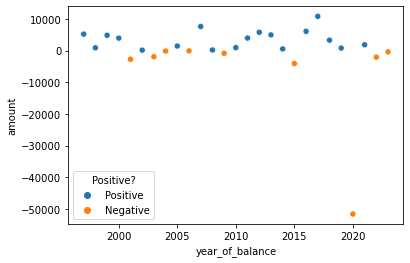

In [56]:
# Use scatterplot to identify the distribution of positive versus negative years.
# We observe that out of 27 years, the government is in deficit for only 9 years.
# We also observe an outlier in year 2020, where the government ran a huge deficit, most likely due to covid.

sns.scatterplot(x='year_of_balance', y='amount', hue='Positive?', data=govt_fp_overall_fp)

In [177]:
# Validate Assumption B. 
# BAU expenditure does not change much over the years, but development expenses may change depending government policies.
# Take the Total Expenditure table, do a groupby financial_year and type. 

grouped_govt_te = govt_te.groupby(['financial_year', 'type'])[['amount','percent_of_gdp']].sum()
display(grouped_govt_te)

amount  percent_of_gdp
financial_year type                               
1997           Development    8961           0.059
               Operating     14079           0.094
1998           Development   12283           0.086
               Operating     14651           0.103
1999           Development   10210           0.068
               Operating     14869           0.098
2000           Development    9493           0.056
               Operating     18416           0.108
2001           Development    8769           0.054
               Operating     18537           0.115
2002           Development    7793           0.047
               Operating     19357           0.114
2003           Development    8510           0.048
               Operating     19989           0.116
2004           Development    8601           0.044
               Operating     20355           0.102
2005           Development    7191           0.033
               Operating     21443           0.099
2006           Development    5980           0.022
               Operating     23925           0.099
2007           Development    7028           0.023
               Operating     25952           0.093
2008           Development    9356           0.033
               Operating     28736           0.106
2009           Development   10980           0.035
               Operating     30909           0.103
2010           Development   12068           0.035
               Operating     33271           0.098
2011           Development   11413           0.030
               Operating     35150           0.097
2012           Development   12583           0.033
               Operating     36421           0.099
2013           Development   12003           0.031
               Operating     39724           0.102
2014           Development   13965           0.034
               Operating     42687           0.104
2015           Development   19355           0.044
               Operating     48091           0.113
2016           Development   18917           0.041
               Operating     52128           0.115
2017           Development   17975           0.037
               Operating     55579           0.114
2018           Development   20266           0.038
               Operating     57559           0.112
2019           Development   16673           0.032
               Operating     58668           0.114
2020           Development   13430           0.026
               Operating     72935           0.148
2021           Development   16254           0.027
               Operating     78543           0.132
2022           Development   20627           0.031
               Operating     86317           0.133
2023           Development   20527           0.030
               Operating     83620           0.125

In [163]:
# Import matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
# Reset the financial_year and type from index back to columns

grouped_govt_te = grouped_govt_te.reset_index()

<AxesSubplot:xlabel='financial_year', ylabel='amount'>

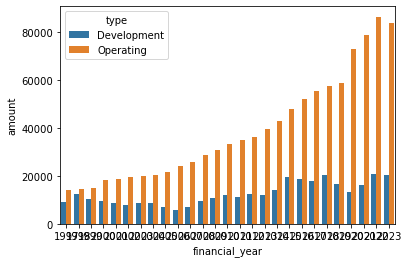

In [165]:
# Create a barplot to plot the trend of Development and Operating expenditures over the year.
# Operating expenditure has risen significantly over the years, from 14 billion to 83 billion.
# On the other hand, Development expenditure has only experienced a more gradual increase, from 10 billion to 20 billion.

sns.barplot(x='financial_year', y='amount', hue = 'type', data = grouped_govt_te)

***Conclusions for this section***

*1. We can see from the earlier scatterplot that in most years the government ran a positive fiscal position.
*2. Operating expenditure has risen significantly over the years, but Development expenditure has only experienced slight increase.

---

#### <u>Section 3: Hypotheses</u>

1. Hypothesis 1 - 
2. Hypothesis 2 - 
3. Hypothesis 3 - 

***Hypothesis 1 -***

- *Describe motivation(s) for hypothesis*
- *Explain how plot aims to support or defeat hypothesis*
- *Show plots*
- *Make conclusions*

**Hypothesis 1
If govt fiscal position is negative this year, in the next year, the total operating expenditure will decrease.
To do this, I need to combine fiscal position and government total expenditure tables.
I need to calculate change in total operating expenditure between this year and previous year.
I can use scatterplot to take overall last year's fiscal position from fp to compare against this year's change in total operating expenditure

In [166]:
# Rename column year of balance to financial year

govt_fp_overall_fp = govt_fp_overall_fp.rename({'year_of_balance': 'financial_year'}, axis=1)
govt_fp_overall_fp.head()

,financial_year,actual_revised_estimated,category,item,amount,percent_of_gdp,Positive?
54,1997,Actual,Balance,Overall Fiscal Position,5252,0.035,Positive
55,1998,Actual,Balance,Overall Fiscal Position,925,0.007,Positive
56,1999,Actual,Balance,Overall Fiscal Position,4885,0.032,Positive
57,2000,Actual,Balance,Overall Fiscal Position,3983,0.024,Positive
58,2001,Actual,Balance,Overall Fiscal Position,-2698,-0.017,Negative


In [171]:
# Merge filtered Govt Fiscal Position with filtered Govt Total Expenditures tables on financial year based on inner join.
# Filter only records where Type = 'Operating'.
# Create a new column called 'diff_amount' to compare between this year and previous year operating expenses.
# Create a new column called 'last_yr_x' to extract last year's fiscal position.

combined = pd.merge(govt_fp_overall_fp, grouped_govt_te, on='financial_year', how='inner')
combined_opr_only = combined.loc[combined.type == 'Operating']
combined_opr_only['diff_amount'] = combined_opr_only['amount_y'].diff()
combined_opr_only['last_yr_x'] = combined_opr_only['amount_x'].shift()
display(combined_opr_only)

<ipython-input-171-a7322355e656>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_opr_only['diff_amount'] = combined_opr_only['amount_y'].diff()
<ipython-input-171-a7322355e656>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_opr_only['last_yr_x'] = combined_opr_only['amount_x'].shift()


,financial_year,actual_revised_estimated,category,item,amount_x,percent_of_gdp_x,Positive?,type,amount_y,percent_of_gdp_y,diff_amount,last_yr_x
1,1997,Actual,Balance,Overall Fiscal Position,5252,0.035,Positive,Operating,14079,0.094,NaN,NaN
3,1998,Actual,Balance,Overall Fiscal Position,925,0.007,Positive,Operating,14651,0.103,572.0,5252.0
5,1999,Actual,Balance,Overall Fiscal Position,4885,0.032,Positive,Operating,14869,0.098,218.0,925.0
7,2000,Actual,Balance,Overall Fiscal Position,3983,0.024,Positive,Operating,18416,0.108,3547.0,4885.0
9,2001,Actual,Balance,Overall Fiscal Position,-2698,-0.017,Negative,Operating,18537,0.115,121.0,3983.0
11,2002,Actual,Balance,Overall Fiscal Position,191,0.001,Positive,Operating,19357,0.114,820.0,-2698.0
13,2003,Actual,Balance,Overall Fiscal Position,-1887,-0.011,Negative,Operating,19989,0.116,632.0,191.0
15,2004,Actual,Balance,Overall Fiscal Position,-105,-0.001,Negative,Operating,20355,0.102,366.0,-1887.0
17,2005,Actual,Balance,Overall Fiscal Position,1486,0.007,Positive,Operating,21443,0.099,1088.0,-105.0
19,2006,Actual,Balance,Overall Fiscal Position,-55,0.000,Negative,Operating,23925,0.099,2482.0,1486.0


<AxesSubplot:xlabel='last_yr_x', ylabel='diff_amount'>

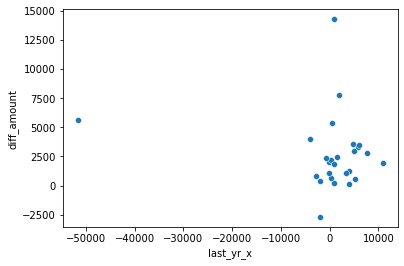

In [172]:
# Create a scatterplot to compare independent variable previous year fiscal position with dependent variable delta in total operating expenses
sns.scatterplot(x='last_yr_x', y='diff_amount', data=combined_opr_only)

In [173]:
# remove outlier for year=2021
combined_opr_only.replace(-51567.0, 0, inplace=True)
combined_opr_only.head()

C:\Users\Shao Xuan Luo\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,financial_year,actual_revised_estimated,category,item,amount_x,percent_of_gdp_x,Positive?,type,amount_y,percent_of_gdp_y,diff_amount,last_yr_x
1,1997,Actual,Balance,Overall Fiscal Position,5252,0.035,Positive,Operating,14079,0.094,NaN,NaN
3,1998,Actual,Balance,Overall Fiscal Position,925,0.007,Positive,Operating,14651,0.103,572.0,5252.0
5,1999,Actual,Balance,Overall Fiscal Position,4885,0.032,Positive,Operating,14869,0.098,218.0,925.0
7,2000,Actual,Balance,Overall Fiscal Position,3983,0.024,Positive,Operating,18416,0.108,3547.0,4885.0
9,2001,Actual,Balance,Overall Fiscal Position,-2698,-0.017,Negative,Operating,18537,0.115,121.0,3983.0


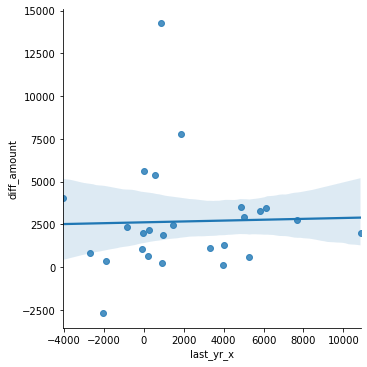

In [174]:
# Create lmplot to compare independent variable last year Overall Fiscal Position, 
# against dependent variable difference in Operating Expenditure

sns.lmplot(x='last_yr_x', y='diff_amount', data=combined_opr_only)

In [175]:
# Import scipy 

import scipy.stats

In [176]:
# Calculate the slope (or correlation) between independent and dependent varaible.

x = np.array(combined_opr_only['last_yr_x'])
y = np.array(combined_opr_only['diff_amount'])

x = np.delete(x, [0])
y = np.delete(y, [0])

print(x)
print(y)

result = scipy.stats.linregress(x, y)
result.slope

[ 5252.   925.  4885.  3983. -2698.   191. -1887.  -105.  1486.   -55.
  7656.   239.  -819.   980.  4003.  5821.  4998.   571. -4050.  6125.
 10861.  3339.   845.     0.  1880. -2036.]
[  572.   218.  3547.   121.   820.   632.   366.  1088.  2482.  2027.
  2784.  2173.  2362.  1879.  1271.  3303.  2963.  5404.  4037.  3451.
  1980.  1109. 14267.  5608.  7774. -2697.]


0.02536679644381021

**Conclusion on Hypothesis 1: 
We can observe there is a negligible correlationship of 0.025366 between previous year's fiscal position, and the delta in operating expenditure between current and previous year. We believe there are other factors that could affect operating expenditure.

In [178]:
# Thought process 2
# We wanted to understand the trend in manpower between 1997 and 2023.
# We took the manpower table, groupby financial year to calculate total manpower headcount for each year. 

grouped_govt_mp = govt_mp.groupby('financial_year')[['actual_revised_estimated','number']].sum()
grouped_govt_mp.head()

,number
financial_year,
1997,97483.0
1998,101760.0
1999,105582.0
2000,105439.0
2001,106995.0


<AxesSubplot:xlabel='financial_year'>

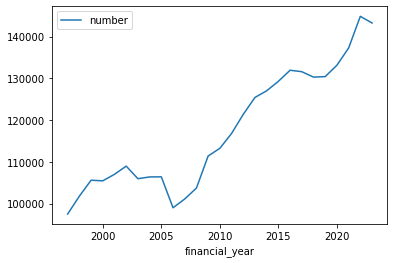

In [179]:
# Thought process 2
# Create a simple plot to understand the trend 
# We observe an increase in government manpower headcount over the years, from less than 100,000 (1997) to more than 140,000 (2023). 
# This represents a 1.35% compound annual growth rate. 

grouped_govt_mp.plot()

**Hypothesis 2:
We think this increase in headcount could also have an impact on operating expenditure.

In [180]:
# Create a new column in Manpower table called 'diff_headcount', to calculate change in manpower headcount between this year and previous year.
# Merge Manpower with filtered Total Expenditure table on financial year using inner join.

grouped_govt_mp['diff_headcount'] = grouped_govt_mp['number'].diff()
combined_final = pd.merge(combined_opr_only, grouped_govt_mp, on='financial_year', how='inner')
display(combined_final)

,financial_year,actual_revised_estimated,category,item,amount_x,percent_of_gdp_x,Positive?,type,amount_y,percent_of_gdp_y,diff_amount,last_yr_x,number,diff_headcount
0,1997,Actual,Balance,Overall Fiscal Position,5252,0.035,Positive,Operating,14079,0.094,NaN,NaN,97483.0,NaN
1,1998,Actual,Balance,Overall Fiscal Position,925,0.007,Positive,Operating,14651,0.103,572.0,5252.0,101760.0,4277.0
2,1999,Actual,Balance,Overall Fiscal Position,4885,0.032,Positive,Operating,14869,0.098,218.0,925.0,105582.0,3822.0
3,2000,Actual,Balance,Overall Fiscal Position,3983,0.024,Positive,Operating,18416,0.108,3547.0,4885.0,105439.0,-143.0
4,2001,Actual,Balance,Overall Fiscal Position,-2698,-0.017,Negative,Operating,18537,0.115,121.0,3983.0,106995.0,1556.0
5,2002,Actual,Balance,Overall Fiscal Position,191,0.001,Positive,Operating,19357,0.114,820.0,-2698.0,108958.0,1963.0
6,2003,Actual,Balance,Overall Fiscal Position,-1887,-0.011,Negative,Operating,19989,0.116,632.0,191.0,105945.0,-3013.0
7,2004,Actual,Balance,Overall Fiscal Position,-105,-0.001,Negative,Operating,20355,0.102,366.0,-1887.0,106368.0,423.0
8,2005,Actual,Balance,Overall Fiscal Position,1486,0.007,Positive,Operating,21443,0.099,1088.0,-105.0,106391.0,23.0
9,2006,Actual,Balance,Overall Fiscal Position,-55,0.000,Negative,Operating,23925,0.099,2482.0,1486.0,98981.0,-7410.0


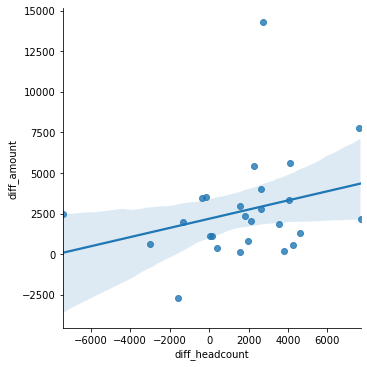

In [181]:
# Create lmplot using independent variable difference in manpower headcount against dependent variable difference in operating expenditure

sns.lmplot(x='diff_headcount', y='diff_amount', data=combined_final)

In [182]:
# Calculate the slope (correlation)
x2 = np.array(combined_final['diff_headcount'])
y2 = np.array(combined_final['diff_amount'])

# remove year 1997 data with NaN value
x2 = np.delete(x2, [0])
y2 = np.delete(y2, [0])

print(x2)
print(y2)

result = scipy.stats.linregress(x2, y2)
result.slope

[ 4277.   3822.   -143.   1556.   1963.  -3013.    423.     23.  -7410.
  2101.   2626.   7680.   1836.   3555.   4591.   4051.   1592.   2275.5
  2648.5  -347.  -1300.    125.   2726.   4121.   7595.  -1595. ]
[  572.   218.  3547.   121.   820.   632.   366.  1088.  2482.  2027.
  2784.  2173.  2362.  1879.  1271.  3303.  2963.  5404.  4037.  3451.
  1980.  1109. 14267.  5608.  7774. -2697.]


0.2822399749978681

**Conclusion on Hypothesis 2:
We can observe a stronger correlationship of 0.28224 between change in headcount and delta in development expenditure. 

**Hypothesis 3:
We think that using both independent variables together - previous year's fiscal position and change in headcount - can give us a reasonable prediction on delta in operating expenditure.

In [183]:
# import linear model from sklearn

from sklearn import linear_model

In [184]:
# Convert NaN values to 0 for year 1997 data

combined_final.fillna(0, inplace=True)
combined_final.loc[combined_final['financial_year'] == 1997]

,financial_year,actual_revised_estimated,category,item,amount_x,percent_of_gdp_x,Positive?,type,amount_y,percent_of_gdp_y,diff_amount,last_yr_x,number,diff_headcount
0,1997,Actual,Balance,Overall Fiscal Position,5252,0.035,Positive,Operating,14079,0.094,0.0,0.0,97483.0,0.0


In [185]:
# Create a multi-linear regression model
# Use two independent variables - 1. previous year's fiscal position and 2. change in manpower headcount against
# one dependent variable - delta in operating expenditure
# Calculate the intercept and coefficients

X = combined_final[['last_yr_x', 'diff_headcount']]
Y = combined_final['diff_amount']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print(regr.coef_)
print(regr.intercept_)

[0.04851083 0.29826662]
1975.747043847404


In [186]:
# y = (coef_a * last_yr_x) + (coef_b * diff_headcount) + intercept

predicted_delta_dev_exp = regr.predict([[-2036, -1595]])
print(predicted_delta_dev_exp)

[1401.24374083]


**Conclusion on Hypothesis 3:
Government's 2023 estimation: -2.697 billion
Our 2023 Prediction: 1.401.24 billion
Given that our prediction is significantly different from government’s estimation, more research is required to understand other factors in play that can affect Operating expenditure.

**Hypothesis 4:
We think that an aging population could have an influence on healthcare expenditure.

In [187]:
# Load libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime
import re

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# Setting baseline seed
np.random.seed(240124)

# Set print options.

np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 12

%matplotlib inline


In [194]:
# Read government manpower
gov_manpower = pd.read_csv('government-manpower.csv')

In [196]:
filtered_gov_manpower = gov_manpower[gov_manpower['ministry'] == 'Health']
filtered_gov_manpower.reset_index(drop=True, inplace=True)
filtered_gov_manpower.head()

,financial_year,actual_revised_estimated,ministry,number
0,1997,Actual,Health,5264.0
1,1998,Actual,Health,5052.0
2,1999,Actual,Health,4855.0
3,2000,Actual,Health,1670.0
4,2001,Actual,Health,948.0


In [198]:
# Read government expenditure
gov_ttlexp_df = pd.read_csv('government-total-expenditure.csv')

In [199]:
filtered_gov_ttlexp_df= gov_ttlexp_df[gov_ttlexp_df['ministry'] == 'Health']
filtered_gov_ttlexp_df.reset_index(drop=True, inplace=True)
filtered_gov_ttlexp_df.head()

,financial_year,actual_revised_estimated,sector,ministry,type,amount,percent_of_gdp
0,1997,Actual,Social Development,Health,Development,274,0.002
1,1998,Actual,Social Development,Health,Development,251,0.002
2,1999,Actual,Social Development,Health,Development,153,0.001
3,2000,Actual,Social Development,Health,Development,140,0.001
4,2001,Actual,Social Development,Health,Development,145,0.001


In [208]:
new_df = pd.pivot_table(filtered_gov_ttlexp_df, values='amount', index='financial_year', aggfunc=np.sum)
new_df['number'] = filtered_gov_manpower.set_index('financial_year')['number']
new_df.reset_index(inplace=True)
new_df.head()

,financial_year,amount,number
0,1997,1170,5264.0
1,1998,1243,5052.0
2,1999,1089,4855.0
3,2000,1212,1670.0
4,2001,1590,948.0


In [209]:
# new_df = new_df.set_index('financial_year')
new_df = new_df.set_index(new_df.columns[0])
new_df['% increase'] = new_df['amount'].pct_change() * 100

In [210]:
# We wanted to bring in external data to understand the sg population distribution in terms of age.
# Read external date population.csv
pop_df = pd.read_csv('population.csv')
pop_df.head()

,Data Series,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
0,Singapore Residents,"4,149,253","4,073,239","3,986,842","4,044,210","4,026,209","3,994,283","3,965,796","3,933,559","3,902,690",...,"2,647,627","2,598,458","2,553,864","2,518,598","2,482,615","2,443,705","2,406,165","2,365,707","2,324,403","2,282,125"
1,0 Year,"30,052","32,073","31,611","33,434","32,967","32,664","33,374","34,640","34,559",...,"50,886","46,695","39,345","40,841","42,487","39,990","42,112","41,039","40,676","35,380"
2,1 Year,"34,223","33,844","36,172","35,585","35,454","36,123","37,714","37,740","35,919",...,"46,195","38,371","39,508","41,005","38,677","40,951","40,133","40,253","35,882","37,330"
3,2 Year,"34,813","37,319","36,092","36,387","37,267","38,787","39,002","36,905","38,394",...,"38,511","39,644","41,075","38,763","41,107","40,279","40,422","36,413","37,645","35,816"
4,3 Year,"38,149","37,204","36,644","37,823","39,428","39,727","37,738","39,141","38,108",...,"39,789","41,183","38,859","41,191","40,405","40,558","36,909","37,930","36,083","38,649"


In [227]:
# Transpose the data
transposed_pop_df = pop_df.transpose()
transposed_pop_df.columns = transposed_pop_df.iloc[0]
transposed_pop_df = transposed_pop_df[1:]

# Convert index to integer type
transposed_pop_df = transposed_pop_df[transposed_pop_df.index != 'Data Series']
transposed_pop_df.index = transposed_pop_df.index.astype(int)
transposed_pop_df.iloc[1:] = transposed_pop_df.iloc[1:].replace(',', '', regex=True)
transposed_pop_df.iloc[1:] = transposed_pop_df.iloc[1:].apply(pd.to_numeric, errors='coerce')

# Categorise the population by 'young' and 'aging'
# Young refers to below 65
# Aging refers to 65 and above
transposed_pop_df['young'] = transposed_pop_df.iloc[1:64].sum(axis=1)
transposed_pop_df['aging'] = transposed_pop_df.iloc[:, 65:-2].sum(axis=1)

In [228]:
transposed_pop_df.rename(columns={transposed_pop_df.columns[-1]: 'Aging'}, inplace=True)
transposed_pop_df.rename(columns={transposed_pop_df.columns[-2]: 'Working'}, inplace=True)

In [229]:
#final_df = new_df.merge(transposed_pop_df.iloc[:, -2:])
final_df = new_df.merge(transposed_pop_df[['Working', 'Aging']], left_index=True, right_index=True)

In [239]:
# transposed_pop_df.drop(transposed_pop_df[transposed_pop_df['Working'] == np.nan].index, inplace = True)
transposed_pop_df.drop(2023, inplace=True)

In [252]:
transposed_pop_df.head()

Data Series,Singapore Residents,0 Year,1 Year,2 Year,3 Year,4 Year,5 Year,6 Year,7 Year,8 Year,...,88 Year,89 Year,65 Years & Over,70 Years & Over,75 Years & Over,80 Years & Over,85 Years & Over,90 Years & Over,Working,Aging
2022,4.07324e+06,32073,33844,37319,37204,37645,38874,40700,41162,39490,...,6930,5550,678133,430203,241619,135827,60890,22942,9693150.0,2.2573e+06
2021,3.98684e+06,31611,36172,36092,36644,37916,39696,40256,38767,40395,...,6323,5441,639008,403617,222291,131313,59758,22090,9429671.0,2.1272e+06
2020,4.04421e+06,33434,35585,36387,37823,39847,40464,39002,40966,40230,...,6073,5034,614368,384972,214964,123974,57461,20875,9484159.0,2.04272e+06
2019,4.02621e+06,32967,35454,37267,39428,40239,38675,40817,40079,38047,...,5593,4969,581680,360384,210257,115657,53364,19429,9373760.0,1.93502e+06
2018,3.99428e+06,32664,36123,38787,39727,38227,40338,39717,37865,39996,...,5504,4824,547854,335753,200207,106880,49777,17786,9229037.0,1.82095e+06


In [243]:
#final_df = new_df.merge(transposed_pop_df.iloc[:, -2:])
final_df = new_df.merge(transposed_pop_df[['Working', 'Aging']], left_index=True, right_index=True)

In [244]:
from sklearn.preprocessing import MinMaxScaler

In [245]:
# We want to employ a scalar graph tool in order to normalise the axis to a standardised range of 0 to 1.
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the 'amount' column
normalized_amount = scaler.fit_transform(final_df['amount'].values.reshape(-1, 1))

# Normalize the 'number' column
normalized_number = scaler.fit_transform(final_df['number'].values.reshape(-1, 1))

# Normalize the 'Aging' column
normalized_aging = scaler.fit_transform(final_df['Aging'].values.reshape(-1, 1))

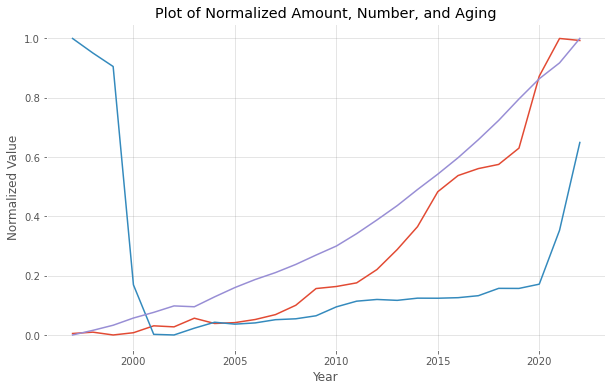

In [250]:
plt.figure(figsize=(10, 6))
plt.plot(final_df.index, normalized_amount, label='Normalized Expenditure in Millions')
plt.plot(final_df.index, normalized_number, label='Normalized Manpower')
plt.plot(final_df.index, normalized_aging, label='Normalized Aging') 

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Plot of Normalized Amount, Number, and Aging')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Normalized Amount, Number, and Aging')

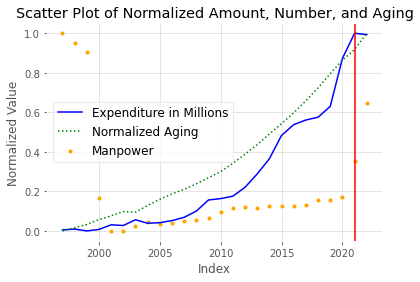

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=final_df, x=final_df.index, y=normalized_amount.flatten(), color='blue', label='Expenditure in Millions')
sns.scatterplot(data=final_df, x=final_df.index, y=normalized_number.flatten(), color='orange', label='Manpower', s=20)
sns.lineplot(data=final_df, x=final_df.index, y=normalized_aging.flatten(), color='green', label='Normalized Aging', linestyle='dotted')

plt.axvline(x=2021, color='red', linestyle='-')  # Add this line to draw a vertical line at x=2021

plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.title('Scatter Plot of Normalized Amount, Number, and Aging')

#### <u>Section 4: Conclusion</u>

*Overall summary of your work, any final conclusions or recommendations, suggested future work, etc*

---

*1. More research is required to understand other factors in play that can affect Operating expenditure.
*2. Instead of using aggregated manpower and fiscal position numbers, we can analyse data at a more granular level, for example into each ministry, understand the individual driving factors to predict their expenses, then consolidate into an overall number.
*3. The model is also simplistic in that we assume SG government only considers previous year's fiscal position and change in manpower headcount, when in reality it would have taken a longer time horizon (i.e past 5 or 10 years change in fiscal position and change in manpower headcount)
*4. In our deepdive into health expenditure, and comparing against external data sg population, we are able to observe that the health expenditure trends very closely with the aging population. This suggests that the aging population could be contributing to rising healthcare expenses.